In [1]:
from __future__ import print_function, division
import numpy as np
from utils import normalize, euclidean_distance, Plot
#from mlfromscratch.unsupervised_learning import *

class KMeans():
    """A simple clustering method that forms k clusters by iteratively reassigning
    samples to the closest centroids and after that moves the centroids to the center
    of the new formed clusters.


    Parameters:
    -----------
    k: int
        The number of clusters the algorithm will form.
    max_iterations: int
        The number of iterations the algorithm will run for if it does
        not converge before that. 
    """
    def __init__(self, k=2, max_iterations=500):
        self.k = k
        self.max_iterations = max_iterations

    def _init_random_centroids(self, X):
        """ Initialize the centroids as k random samples of X"""
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    def _closest_centroid(self, sample, centroids):
        """ Return the index of the closest centroid to the sample """
        closest_i = 0
        closest_dist = float('inf')
        for i, centroid in enumerate(centroids):
            distance = euclidean_distance(sample, centroid)
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        return closest_i

    def _create_clusters(self, centroids, X):
        """ Assign the samples to the closest centroids to create clusters """
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    def _calculate_centroids(self, clusters, X):
        """ Calculate new centroids as the means of the samples in each cluster  """
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    def _get_cluster_labels(self, clusters, X):
        """ Classify samples as the index of their clusters """
        # One prediction for each sample
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    def predict(self, X):
        """ Do K-Means clustering and return cluster indices """

        # Initialize centroids as k random samples from X
        centroids = self._init_random_centroids(X)

        # Iterate until convergence or for max iterations
        for _ in range(self.max_iterations):
            # Assign samples to closest centroids (create clusters)
            clusters = self._create_clusters(centroids, X)
            # Save current centroids for convergence check
            prev_centroids = centroids
            # Calculate new centroids from the clusters
            centroids = self._calculate_centroids(clusters, X)
            # If no centroids have changed => convergence
            diff = centroids - prev_centroids
            if not diff.any():
                break

        return self._get_cluster_labels(clusters, X)



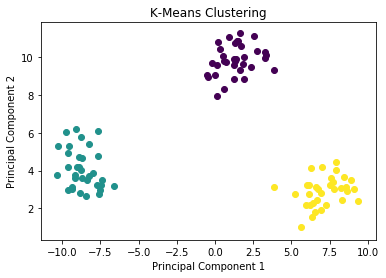

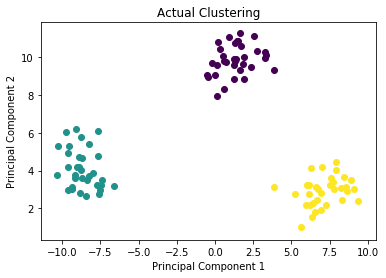

In [3]:
from __future__ import division, print_function
from sklearn import datasets
import numpy as np

from utils import Plot


def main():
    # Load the dataset
    X, y = datasets.make_blobs()

    # Cluster the data using K-Means
    clf = KMeans(k=3)
    y_pred = clf.predict(X)

    # Project the data onto the 2 primary principal components
    p = Plot()
    p.plot_in_2d(X, y_pred, title="K-Means Clustering")
    p.plot_in_2d(X, y, title="Actual Clustering")



if __name__ == "__main__":
    main()